In [75]:
# -*- coding: utf-8 -*-

#農研機構ハンズオントレーニング用資料
#2017年6月　戸田陽介（名古屋大学　理学研究科　博士研究員）
#pythonの基本的な使い方を紹介し、

#イネの種子の選別を行う人工知能構築をテーマに画像解析の初歩からディープラーニングまで学んでいきます。

#レベル１人工知能ー手動特徴量設計、手動閾値による分類
#レベル２人工知能ー手動特徴量設計、自動閾値による分類
#レベル３人工知能ー自動特徴量設計による分類


In [76]:
#pythonでは最初に使用するライブラリを定義します。
import numpy as np 
import math, os, sys

import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import ndimage
from scipy.misc import imread, imsave, imresize

from skimage import measure, morphology
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_isodata

from sklearn import svm, datasets
from sklearn.externals import joblib
import pandas as pd

print ("ライブラリが正常に読み込まれました。")

ライブラリが正常に読み込まれました。


In [3]:
#pythonの基本


#pythonでは行頭に半角の「#」を挿入する事で
#プログラムには関係ないコメント行（メモや説明行）として扱うことができます。
#それ以外の行は全てプログラムとして処理されます。

In [4]:
#基本。プリントで任意の情報を出力します。
print ("hello world!")

hello world!


In [5]:
#エラーが出たらインターネットで調べてみよう
print hello world!

#  File "<ipython-input-111-5feb1caebbf0>", line 2
#    print hello world!
#              ^
#SyntaxError: Missing parentheses in call to 'print'

#最後の行で検索すると同じ間違えをした誰かの事例が出て来る。
#この場合はprint関数は()が必要なのになかったという意味。
#python2ではがいりませんでしたが、python3では必須になりました。

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-5-323917353b61>, line 2)

In [6]:
#変数の代入と利用。aの値を変えてどうなるか試してみましょう。
a = 2

print (a) #変数の場合は""がいりません。
print ("aの中身は", a, "です") #カンマで区切ると一行に複数の情報を記載できます。

2
aの中身は 2 です


In [7]:
#変数の種類
v = 1 #整数 , int
v = "a" # 文字 , str
v = True # 論理値 , bool. trueとfalseのみ""はいらない。


In [8]:
#リスト
v = [1,3,5]
print (v[0]) #リストの最初は０で始まる
print (v[1])
print (v[2])
print (v[3]) #４番目はないのでこの行でエラーになる。

1
3
5


IndexError: list index out of range

In [ ]:
#変数の計算。a、bの値を変えてどうなるかためしてみましょう。
a = 2
b = 3
print (a+b)
print (a-b)
print (a*b)
print (a/b)
a += 1 # +=1とは1を加算する事です
print (a)

In [9]:
#結果は違う変数に代入できます。
a=1
b=2
c=a+b
print (c)

3


In [10]:
#一度代入された変数はkernelを再起動するか、代入しなおすまで保持されます。
print (a)

1


In [11]:
#ちなみにpythonの世界では「=」は代入という意味です。
#等号記号は「==」になります。
a=1
b=2
print (a==b) #a is not equal to bなので falseをかえします。


a=1
b=1
print (a==b) #この場合はtrue


False
True


In [12]:
#条件分岐。aの値を変えてどうなるか試してみましょう。
#ちなみにifの中はタブもしくはスペース４つ分です。
a = 1

if a > 2:
    print ("aは２よりも大きい")
elif a ==2: #ifではなくて、もし〜〜ならば、
    print ("aは２と等しい")
else: #もし上記条件のいずれにもあてはまなければ、
    print ("aは２よりも小さい")

aは２よりも小さい


In [13]:
#くりかえし処理の表現方法です。条件を満たす限り、whileの処理を繰り返します。

a=0
while a <10: #aが１０未満の間、下の処理を繰り返す。
    print ("aは", a, "です")
    a+=1 #aに１加算します。
print ("aは10に達しました")

aは 0 です
aは 1 です
aは 2 です
aは 3 です
aは 4 です
aは 5 です
aは 6 です
aは 7 です
aは 8 です
aは 9 です
aは10に達しました


In [14]:
#繰り返し処理2, for. 

for n in [1,20,300]: #この場合の変数nはin 以後の要素を意味しているので指定する必要はありません。
    print (n)

1
20
300


In [15]:
#関数の定義と利用
#pythonは基本上から一行ずつ順番に実行されていきますが、関数は定義しても呼び出されるまで動きません。

def simple(x): #defはdefine,　xは引数（ひきすう）。
    x +=1
    return x #return ~~は戻り値

def simple2(x,y): #引数は複数指定できます。
    z = x - y
    return z
def simple3(x,y): #戻り値も複数指定できます。
    z1 = x+y
    z2 = x-y
    return z1, z2

def noreturn(z):
    print ("関数noreturnに入力されたデータは",z,"です") #戻り値のない関数も定義できます。

a= simple(1) #simple関数に1を入れると、関数を実行し、戻り値をaに代入します。
print (a)

a = simple2(1,2)
print (a)

z1,z2 = simple3(1,2)
print (z1,z2)

noreturn(2)



2
-1
3 -1
関数noreturnに入力されたデータは 2 です


In [16]:
#冒頭でインポートしたライブラリに含まれる関数を使用することができます。
#例えばmathライブラリに含まれる関数を利用してみましょう。
#参考https://docs.python.jp/3/library/math.html

a = 5/2
print (a)
print (math.ceil(a)) #小数点切り上げ
print (math.floor(a)) #小数点を切り捨て
#jupyter限定でオートコンプリート機能が使えます。
#次の行で「math.」とタイプした後にタブを押して下さい。使える関数一覧を見ることができます。

2.5
3
2


In [17]:
#imreadの機能を使って画像をimage変数に読み込みます。
#imreadは画像があるディレクトリを入力すると、画像を数値行列として扱う結果を返します。
#その結果をimage変数に代入しています。
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imread.html
image = imread("image/train/proper/11.jpg")
#下の行をコメントアウト（#を取り除く）して中身を文字情報として見てみましょう。
#
print (image)

[[[0 1 0]
  [0 1 0]
  [0 1 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 2 0]
  [0 1 0]
  [0 0 0]
  ..., 
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[0 2 0]
  [0 1 0]
  [0 0 0]
  ..., 
  [1 0 2]
  [1 0 2]
  [1 0 0]]

 [[0 2 0]
  [0 1 0]
  [0 0 0]
  ..., 
  [1 0 2]
  [1 0 2]
  [1 0 0]]]


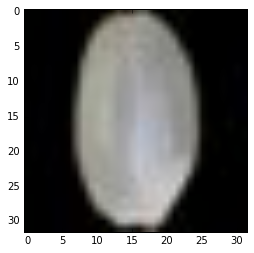

In [18]:
#画像を表示してみましょう。
plt.imshow(image)

In [19]:
#次に画像の情報を取得しましょう。(height, width,  channel)
print (image.shape)

(32, 32, 3)


In [20]:
#変数の後の.shapeはattribute（属性）というもので、変数の種類によって固有の物です。
#dir()でどのような属性を持ってるか確認できます。
#print (dir(image))

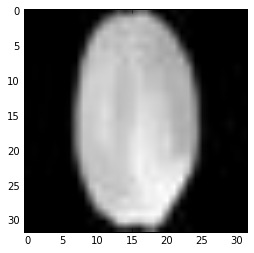

In [21]:
#scikit-imageライブラリを使って画像を色々加工する事ができます。
#rgbカラー画像をgray-scaleに変換して、gray変数に代入する。
gray = rgb2gray(image)
plt.imshow(gray, cmap=plt.cm.gray)
#matplotの画像表示機能では、グレースケールや白黒画像はカラーマップがレインボーで表示されます。明示的に
#下の#を消して実行したらどうなるか試してみて下さい。
#plt.imshow(gray)

thresholdの値は 0.320403376991 です


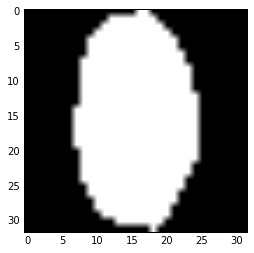

In [22]:
#白黒画像にします。

#大津法を使った二値化で、二値化するための閾値を求めます。
threshold = threshold_otsu(gray)
print ("thresholdの値は", threshold, "です")
#grayの画像の内、thresholdより低い値はFalse（色情報がないマス）とします。
binary = gray > threshold
#上記binaryのようなデータをbooleanと言います。booleanを画像として表示すると白黒になります。
plt.imshow(binary, cmap=plt.cm.gray)

In [23]:
#二値化の画像データから物体の幾何学的情報を抽出することができます。
#scipyライブラリのndimage.labelを使用すると、白黒画像から白の領域を抽出することができます。
#画像データはlabel_imに格納され、nb_labelsは検出された数です。

label_im, nb_labels = ndimage.label(binary)
print ("検出された白の領域の数は", nb_labels, "です")

検出された白の領域の数は 1 です


In [24]:
#検出された領域の特徴（幾何学的性質等）を取得しましょう。
#領域の明度も取得したいので参照用gray画像も併せて利用します。
regionprops = measure.regionprops(label_im, intensity_image=gray)

In [25]:
#領域が２つありますので、情報を見てみましょう。
#参考 http://scikit-image.org/docs/0.12.x/api/skimage.measure.html
print (regionprops[0])
print ("面積は", regionprops[0].area,"pxです。")
print ("長軸長は",regionprops[0].major_axis_length,"pxです。")
print ("__________")


面積は 439 pxです。
長軸長は 31.364997117913834 pxです。
__________


In [26]:
#このように標記することもできます。
for region in regionprops:
    print ("面積は", region.area,"pxです。")
    print ("最大明るさは",region.max_intensity,"pxです。")
    print ("平均明るさは",region.mean_intensity,"pxです。")

print ("__________")

#ちなみにwhileを使用した場合。
i = 0
while i < len(regionprops):
    print ("面積は", regionprops[i].area,"pxです。")
    i += 1


面積は 439 pxです。
最大明るさは 0.808110980392 pxです。
平均明るさは 0.623511245701 pxです。
__________
面積は 439 pxです。


In [27]:
#ここまでの処理を関数にまとめてみましょう。
#画像のパスを入れると測定結果を出力してくれる関数です。

def quantify(path_of_image):
    print ("input is", path_of_image)
    image = imread(path_of_image)
    gray = rgb2gray(image)
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    label_im, nb_labels = ndimage.label(binary)
    regionprops = measure.regionprops(label_im, intensity_image=gray)
    for region in regionprops:
        threshold = 50
        if region.area > threshold: #ifを出力するか否かに組み込むことができます。thresholdの値を500にして結果がどうかわるか見てみましょう。
            print ("\t area is", region.area) #\tはタブとして扱われます。windowsの人は¥tでないとただしく反映されない可能性があります。
            print ("\t max intensity is", region.max_intensity)
            print ("\t average intensity is", region.mean_intensity)
        else:
            print ("\t object area bellow the threshold value of", region.area)

quantify("image/train/proper/11.jpg")
quantify("image/train/proper/12.jpg")

input is image/train/proper/11.jpg
	 area is 439
	 max intensity is 0.808110980392
	 average intensity is 0.623511245701
input is image/train/proper/12.jpg
	 area is 498
	 max intensity is 0.836878431373
	 average intensity is 0.639618940074


In [30]:
#image/proper_trainフォルダに入っている画像全てを処理できるようにしましょう。
#フォルダ内のtifを
def get_file_list_in_folder(directory):
    files=[] #空のリストを用意します。
    if os.path.isdir(directory): #もしdirectoryがディレクトリであれば
        for file in os.listdir(directory): #ディレクトリ内のファイルを１つ１つスキャンする
            if file.endswith(".jpg"): #jpgのみ取得する
                files.append(os.path.join(directory,file))  #リストに追加する
        return files
    else:
        print ("not a valid directory!")
        
files = get_file_list_in_folder("image/train/proper")
print (files) #これでproper_trainフォルダ内の写真のパスが得られました。

['image/train/proper/100.jpg', 'image/train/proper/101.jpg', 'image/train/proper/102.jpg', 'image/train/proper/103.jpg', 'image/train/proper/104.jpg', 'image/train/proper/105.jpg', 'image/train/proper/106.jpg', 'image/train/proper/107.jpg', 'image/train/proper/108.jpg', 'image/train/proper/109.jpg', 'image/train/proper/11.jpg', 'image/train/proper/110.jpg', 'image/train/proper/111.jpg', 'image/train/proper/112.jpg', 'image/train/proper/113.jpg', 'image/train/proper/114.jpg', 'image/train/proper/115.jpg', 'image/train/proper/116.jpg', 'image/train/proper/117.jpg', 'image/train/proper/118.jpg', 'image/train/proper/119.jpg', 'image/train/proper/12.jpg', 'image/train/proper/120.jpg', 'image/train/proper/121.jpg', 'image/train/proper/122.jpg', 'image/train/proper/123.jpg', 'image/train/proper/124.jpg', 'image/train/proper/125.jpg', 'image/train/proper/126.jpg', 'image/train/proper/127.jpg', 'image/train/proper/128.jpg', 'image/train/proper/129.jpg', 'image/train/proper/13.jpg', 'image/train

In [31]:
#filesの中身を順番にquantify関数にかけます。
for file in files:
    quantify(file)

input is image/train/proper/100.jpg
	 area is 467
	 max intensity is 0.838374509804
	 average intensity is 0.683414760045
input is image/train/proper/101.jpg
	 area is 475
	 max intensity is 0.91597254902
	 average intensity is 0.729079247059
input is image/train/proper/102.jpg
	 area is 458
	 max intensity is 0.882620784314
	 average intensity is 0.734230063362
input is image/train/proper/103.jpg
	 area is 475
	 max intensity is 0.935007843137
	 average intensity is 0.720269252425
input is image/train/proper/104.jpg
	 area is 443
	 max intensity is 0.915385098039
	 average intensity is 0.73091520648
input is image/train/proper/105.jpg
	 area is 485
	 max intensity is 0.901663137255
	 average intensity is 0.736766806549
input is image/train/proper/106.jpg
	 area is 487
	 max intensity is 0.875596078431
	 average intensity is 0.743889451222
input is image/train/proper/107.jpg
	 area is 488
	 max intensity is 0.899988627451
	 average intensity is 0.740353670845
input is image/train/prope

In [45]:
#このまま結果をコピペして保存してもよいのですが、
#せっかくなのでcsvファイルに書き出せるように関数をいじります。

def quantify_csv(path_of_image):
    print ("input is", path_of_image)
    image = imread(path_of_image)
    gray = rgb2gray(image)
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    label_im, nb_labels = ndimage.label(binary)
    regionprops = measure.regionprops(label_im, intensity_image=gray)
    
    if len(regionprops)==1: #領域が一つだけの場合、測定領域を戻り値として設定する
        return regionprops[0].area,regionprops[0].max_intensity,regionprops[0].major_axis_length,regionprops[0].mean_intensity
    else:
        print ("more than two region detected. ignoring this image file")
        return 0,0,0,0

In [46]:
#csvに書き込むコマンド
csv = open("output.csv", 'a+')#a+は追記モードです。
csv.write("Grain_type,Area,Max_intensity,Major_axis_length,Average_intensity\n") #headerを記入します。
#注意。mac os9より古い人は\r、windowsは\r\n、macosx、linuxは\nに上記文末を変更。
#osによって使用する改行コードが異なるためです。


files = get_file_list_in_folder("image/train/proper")
for file in files:
    area, max_intensity, major_axis_length, mean_intensity = quantify_csv(file)
    if area != 0:#areaが0ではないとき、以下の処理を行う。
        s=",".join(["1",str(area),str(max_intensity),str(major_axis_length),str(mean_intensity)+"\n"])
        #カンマ区切りで連結する。数字と文字は連結できないので、数字を文字変換するstr()
        #改行コードの変更忘れずに
        csv.write(s)

csv.close()

input is image/train/proper/100.jpg
input is image/train/proper/101.jpg
input is image/train/proper/102.jpg
input is image/train/proper/103.jpg
input is image/train/proper/104.jpg
input is image/train/proper/105.jpg
input is image/train/proper/106.jpg
input is image/train/proper/107.jpg
input is image/train/proper/108.jpg
input is image/train/proper/109.jpg
input is image/train/proper/11.jpg
input is image/train/proper/110.jpg
input is image/train/proper/111.jpg
input is image/train/proper/112.jpg
input is image/train/proper/113.jpg
input is image/train/proper/114.jpg
input is image/train/proper/115.jpg
input is image/train/proper/116.jpg
input is image/train/proper/117.jpg
input is image/train/proper/118.jpg
input is image/train/proper/119.jpg
input is image/train/proper/12.jpg
input is image/train/proper/120.jpg
input is image/train/proper/121.jpg
input is image/train/proper/122.jpg
input is image/train/proper/123.jpg
input is image/train/proper/124.jpg
input is image/train/proper/12

In [47]:
#次は割れ米のデータを取る
csv = open("output.csv", 'a+')#a+は追記モードです。

files = get_file_list_in_folder("image/train/broken")
for file in files:
    area, max_intensity, major_axis_length, mean_intensity = quantify_csv(file)
    if area != 0: #areaが0ではないとき、以下の処理を行う。
        #カンマ区切りで連結する。数字と文字は連結できないので、数字を文字変換するstr()
        s=",".join(["2",str(area),str(max_intensity),str(major_axis_length),str(mean_intensity)+"\n"]) #改行コードの変更忘れずに
        csv.write(s)
csv.close()


input is image/train/broken/141.jpg
input is image/train/broken/142.jpg
input is image/train/broken/144.jpg
input is image/train/broken/145.jpg
input is image/train/broken/147.jpg
input is image/train/broken/150.jpg
input is image/train/broken/152.jpg
input is image/train/broken/155.jpg
input is image/train/broken/156.jpg
input is image/train/broken/158.jpg
input is image/train/broken/160.jpg
input is image/train/broken/161.jpg
input is image/train/broken/162.jpg
input is image/train/broken/164.jpg
input is image/train/broken/165.jpg
input is image/train/broken/166.jpg
input is image/train/broken/167.jpg
input is image/train/broken/168.jpg
input is image/train/broken/169.jpg
input is image/train/broken/170.jpg
input is image/train/broken/171.jpg
input is image/train/broken/172.jpg
input is image/train/broken/173.jpg
input is image/train/broken/174.jpg
input is image/train/broken/175.jpg
input is image/train/broken/176.jpg
input is image/train/broken/177.jpg
input is image/train/broken/

In [42]:
#完成したoutput.csvファイルを開いて確認してみてください。
#このままエクセルやRで解析しても構いません。
#ここまでで大量の画像から任意の情報を取得する方法を紹介しました。

In [43]:
#整粒米と割れ米を識別するレベル１人工知能を作ってみましょう。

In [48]:
#先程作成したcsvファイルを読み込む
df =pd.read_csv("output.csv") #データフレームとして読み込みます。 #ここまでの処理がうまくいかなかった人はoutput_sample.csvを使用してください。
#df =pd.read_csv("output_sample.csv") 

x = df[["Area","Major_axis_length"]] #xに二列分のデータを読み込みます。
X = x.as_matrix() #配列に変換しています。
y = df["Grain_type"] #区分を読み込みます。
y = y.as_matrix()

print ("読み込まれました")

読み込まれました


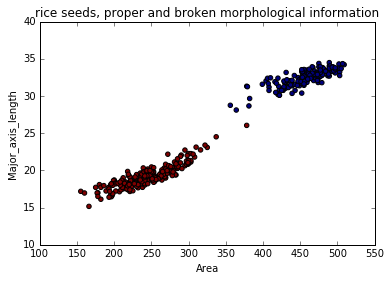

In [49]:
#面積をx軸、平均輝度をy軸にプロットした図を作成してみましょう。

#散布図を作成します。x,y,色ラベル情報,カラーマップと並びます。
plt.scatter(X[:, 0], X[:, 1], c=y)
#軸情報
plt.xlabel('Area')
plt.ylabel('Major_axis_length')
plt.title('rice seeds, proper and broken morphological information')
plt.show()

#エラーがでる場合はoutput.csvを削除してIn[46]からやりなおしてください。

In [50]:
#どうやら面積と長軸長さどちらでも分類ができそうです。今回は面積にしましょう。
#面積を”特徴”に正粒米と割れ米を識別する装置をつくります。

#設計プロセス
#フォルダの中にあるファイルの数を数える
#画像一枚ずつ面積を測る。
#閾値より大きければ整粒米、閾値より小さければ割れ米として処理をする。


#画像のパスと閾値を入力すると、整粒米であれば１、割れ米であれば２、測定できなかった場合３を返す関数
def classify(path_of_image,area_threshold): 
    image = imread(path_of_image)
    gray = rgb2gray(image)
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    label_im, nb_labels = ndimage.label(binary)
    regionprops = measure.regionprops(label_im, intensity_image=gray)
    if len(regionprops)==1: #今回は領域が一つだけ測定できた場合のみにかぎりましょう。
        if regionprops[0].area > area_threshold:
            return 1
        else:
            return 2
    else:
        return 3
    
#ファイルのリストを引数としてとり、整粒米、割れ米、測定できなかった数を集計して返す関数
def count(files,area_threshold):
    no_of_proper = 0
    no_of_broken = 0
    no_of_error = 0

    for file in files:
        result = classify(file,area_threshold) #判別する
        if result == 1:
            no_of_proper += 1
        if result == 2:
            no_of_broken += 1
        if result == 3:
            no_of_error += 1
    return no_of_proper, no_of_broken, no_of_error

In [51]:
files = get_file_list_in_folder("image/train/proper") #上の方で定義したファイルリストを取得する関数
files2 = get_file_list_in_folder("image/train/broken")
#count関数を実行すると、一つ一つの画像に対してclassify関数を実行し、整粒米か割れ米か区別し、帰ってきた結果を集計します。

area_threshold = 30

no_of_proper, no_of_broken, no_of_error = count(files,area_threshold)
length = len(files)
print ("整粒米ディレクトリに入っている画像は",length,"枚です")
print ("測定できたのは",no_of_proper+no_of_broken,"枚です。")
print ("整粒米と判定されたのは",no_of_proper,"枚です。")
print ("割れ米と判定されたのは",no_of_broken,"枚です。")
print ("_________________________________________")
no_of_proper, no_of_broken, no_of_error = count(files2,area_threshold)
length = len(files2)
print ("割れ米ディレクトリに入っている画像は",length,"枚です")
print ("測定できたのは",no_of_proper+no_of_broken,"枚です。")
print ("整粒米と判定されたのは",no_of_proper,"枚です。")
print ("割れ米と判定されたのは",no_of_broken,"枚です。")

#area_thresholdの値を変えながら誤分類がなるべくすくなくなるような値を探してみましょう。
#散布図を見れば想像がつきますが、大体350あたりがよさそうですね。

整粒米ディレクトリに入っている画像は 146 枚です
測定できたのは 146 枚です。
整粒米と判定されたのは 146 枚です。
割れ米と判定されたのは 0 枚です。
_________________________________________
割れ米ディレクトリに入っている画像は 231 枚です
測定できたのは 231 枚です。
整粒米と判定されたのは 231 枚です。
割れ米と判定されたのは 0 枚です。


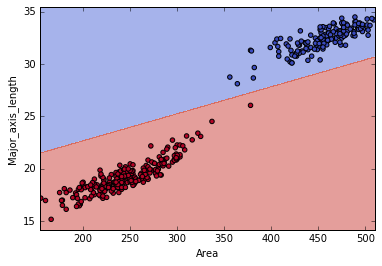

In [52]:
#閾値を手で設定するのは少々大変です。
#レベル２人工知能をつかって閾値を自動的に計算してもらいましょう。
#今回はサポートベクターマシーン（機械学習の一種）による計算を行います。

#念の為読み込みなおす。
#---------------------------
df =pd.read_csv("output.csv")

x = df[["Area","Major_axis_length"]] #xに二列分のデータを読み込みます。
X = x.as_matrix() #配列に変換しています。
y = df["Grain_type"] #区分を読み込みます。
y = y.as_matrix()
#---------------------------

C = 1.0  # SVM regularization parameter
svc=svm.SVC(kernel='linear',C=C).fit(X,y)

h = .02  # step size in the mesh
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Area')
plt.ylabel('Major_axis_length')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


#結果はどのように表示されましたか？
#レベル１では面積のみを指標にしましたが、サポートベクターマシーンは面積と長軸長双方とも使用しているようですね。

In [53]:
#作成した分類器はこのように使うことができます。
virtual_rice = [400,35]  #面積、長軸長
value = np.array(virtual_rice).reshape(1,-1)
prediction = svc.predict(value)
print ("入力された情報から推測される分類クラスは",prediction,"です")
#１が整粒米、２が割れ米です。
#virtual_riceの情報を色々変えてみて結果がどうかわるか試してみて下さい。

入力された情報から推測される分類クラスは [1] です


In [54]:
#おまけ。分類器の保存と復元
#保存したファイルを取っておいて、他のプログラムと組み合わせる事ができます。
#http://web-salad.hateblo.jp/entry/2014/11/09/090000
joblib.dump(svc,'svm_checkpoint.pkl') #保存します
svc=joblib.load('svm_checkpoint.pkl') #復元します
print (svc.predict(value)) #使います。

[1]


In [55]:
#ちなみに他のパラメーターを使用するとどうなるでしょうか？
#整流米は割れ米に比べて楕円らしさが高いですね。
#regionspropsに楕円らしさを測るeccentricityがあります(1が完全な楕円)。それを使用してみましょう。
#csvに保存せずに変数の受け渡しのみで最後までいってみましょう。

proper_ec = [] #空のリストを作成します
broken_ec = []

proper_seeds = get_file_list_in_folder("image/train/proper")  #前に定義した関数を使いまわします。
broken_seeds = get_file_list_in_folder("image/train/broken")

for path_of_image in proper_seeds:
    image = imread(path_of_image)
    gray = rgb2gray(image)
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    label_im, nb_labels = ndimage.label(binary)
    regionprops = measure.regionprops(label_im, intensity_image=gray)
    if len(regionprops) == 1: #1個のみ領域が検出された場合、以下の処理を行う。
        a = regionprops[0].eccentricity
        proper_ec.append(a) #楕円度

for path_of_image in broken_seeds:
    image = imread(path_of_image)
    gray = rgb2gray(image)
    threshold = threshold_otsu(gray)
    binary = gray > threshold
    label_im, nb_labels = ndimage.label(binary)
    regionprops = measure.regionprops(label_im, intensity_image=gray)
    if len(regionprops) == 1: #1個のみ領域が検出された場合、以下の処理を行う。
        a = regionprops[0].eccentricity
        broken_ec.append(a) #楕円度


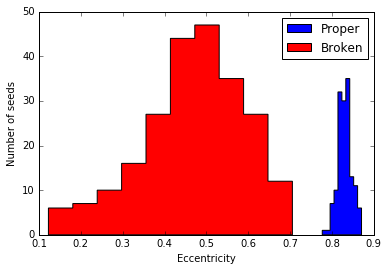

In [56]:
plt.hist(proper_ec,bins=10,histtype='stepfilled', color='b', label='Proper')
plt.hist(broken_ec,bins=10,histtype='stepfilled', color='r', label='Broken')
plt.legend()
plt.xlabel("Eccentricity")
plt.ylabel("Number of seeds")
plt.show()

#このような尺度（特徴量）でも分類することができそうですね。
#このように特徴量設計（定義）がうまくいけば高精度で解析が可能です。ただ、生物情報の解析は往々にして
#うまくいきません、そのような時はレベル３人工知能で紹介するディープラーニングが強い力を発揮します。
#ディープラーニングを利用すると、特徴量設計をコンピュータにまかせることができます。

In [57]:
#次はディープラーニング、レベル３人工知能

In [58]:
from __future__ import print_function
import keras
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [59]:
#ディレクトリから画像を読み込みます。

train_datagen = ImageDataGenerator( #data augmentation　訓練データを水増しします。
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        'image/train/',
        target_size=(32, 32), #height,widthのサイズに強制リサイズします。
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'image/valid/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

print (train_generator.class_indices)
print (validation_generator.class_indices)
#one hot encoding.　正常　＝ [0,1]　割れ= [1,0]といったラベルになっています

Found 377 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
{'proper': 1, 'broken': 0}
{'proper': 1, 'broken': 0}


In [61]:
#モデルの定義。cifar-10のサンプルを流用しています。


input_shape = (32,32,3)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#モデルをチェックしてみましょう。
model.summary()

In [ ]:
model.fit_generator(
        train_generator,
        samples_per_epoch=1000,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=10)

model.save("model.hdf5")

In [74]:
#model.load_weights("model.hdf5")で読み込むことができます。このnotebookを閉じない限りmodelは読み込まれたままです。
from skimage.transform import resize

inputdata = imread("image/146.jpg")/255.
inputdata = resize(inputdata,(32,32))
inputdata = np.expand_dims(inputdata,axis=0)
print(inputdata.shape)

#(1, 32, 32, 3)　（バッチ、height, width, channel）
#モデルには複数の画像（バッチ）を入力するようにしているので、単一のバッチと定義するため、expand_dimを使用
#カラーなので、最後の3はRGBで3チャネルです。

y = model.predict(inputdata)
#0~1の結果が返ってくるので１００をかけて０〜１００％表示に修正
print(y*100.0)

#[0,1]で100%正常米
#[1,0]で100%割れ米


result = np.argmax(y) #何番目の数値が大きいか
if result == 0:
    print ("この画像は割れ米の可能性",y[0][0]*100,"%です")

if result == 1:
    print ("この画像は正常米の可能性",y[0][1]*100,"%です")



(1, 32, 32, 3)
[[  9.99642715e+01   3.57273631e-02]]
この画像は割れ米の可能性 99.9642729759 %です


In [ ]:
#第１層のフィルタの可視化や
#フィルタ適用後の画像等を表示すると、ネットワークがどのように学習しているかより深い理解が可能になります。
#インターネットの様々なサイトでコードを参照できるので各自調べてみて下さい。

#今日はここまでです。